# Car Evaluation Analysis

**AICTE Faculty ID:** 1-3241967546  
**Faculty Name:** Milav Jayeshkumar Dabgar  
**Date:** July 17, 2025

---

## Objective
Analyze car evaluation dataset to classify car acceptability based on various attributes.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

plt.style.use('default')
print("Libraries loaded successfully!")

Libraries loaded successfully!


## Load and Explore Data

In [2]:
# Load dataset with proper column names
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car_evaluation.csv', names=column_names)

print(f"Dataset shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset shape: (1728, 7)

Column names:
['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

First 5 rows:


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# Dataset information
print("Dataset Info:")
print(df.info())
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

Unique values in each column:
buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']


In [4]:
# Check target distribution
print("Car class distribution:")
print(df['class'].value_counts())
print("\nPercentage:")
print(df['class'].value_counts(normalize=True) * 100)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Car class distribution:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

Percentage:
class
unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: proportion, dtype: float64

Missing values:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


## Data Visualization

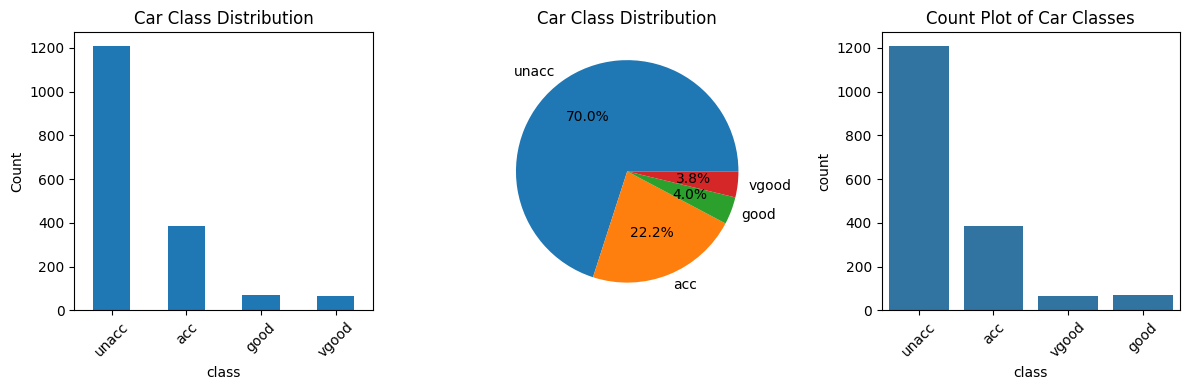

In [5]:
# Target class distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df['class'].value_counts().plot(kind='bar')
plt.title('Car Class Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.pie(df['class'].value_counts(), labels=df['class'].value_counts().index, autopct='%1.1f%%')
plt.title('Car Class Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='class', data=df)
plt.title('Count Plot of Car Classes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

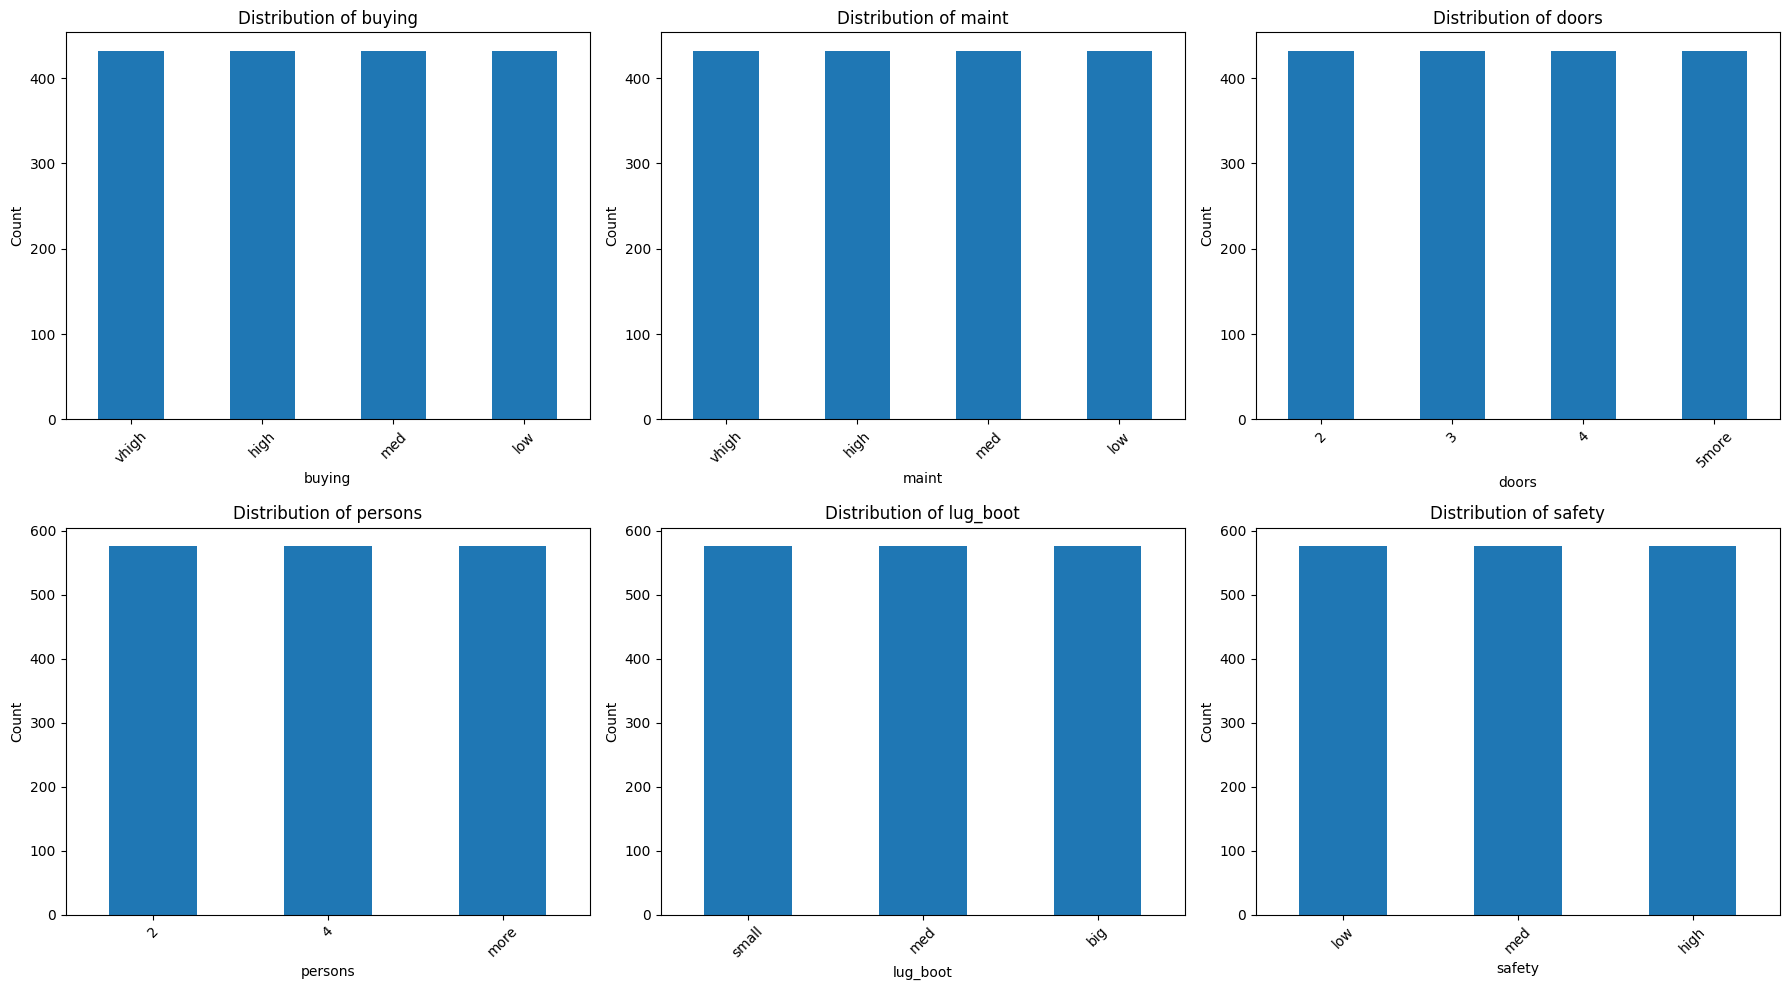

In [6]:
# Distribution of all features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

for i, feature in enumerate(features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

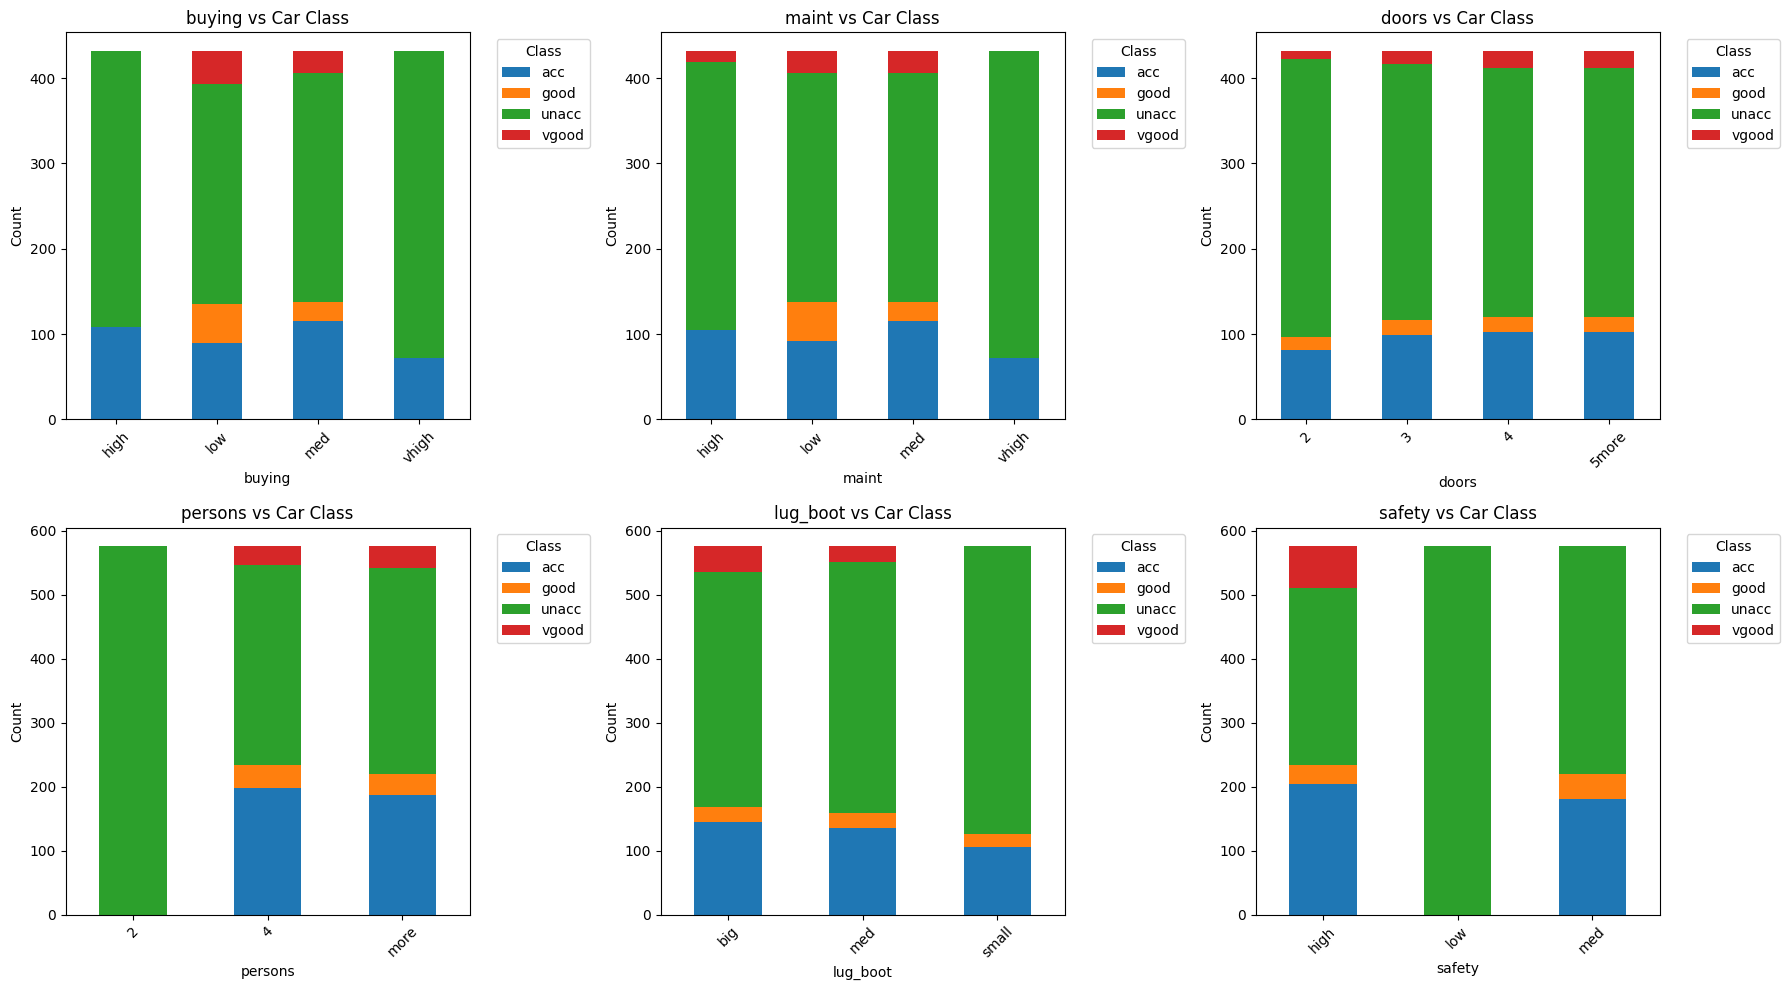

In [7]:
# Feature relationships with car class
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    ct = pd.crosstab(df[feature], df['class'])
    ct.plot(kind='bar', ax=axes[i], stacked=True)
    axes[i].set_title(f'{feature} vs Car Class')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

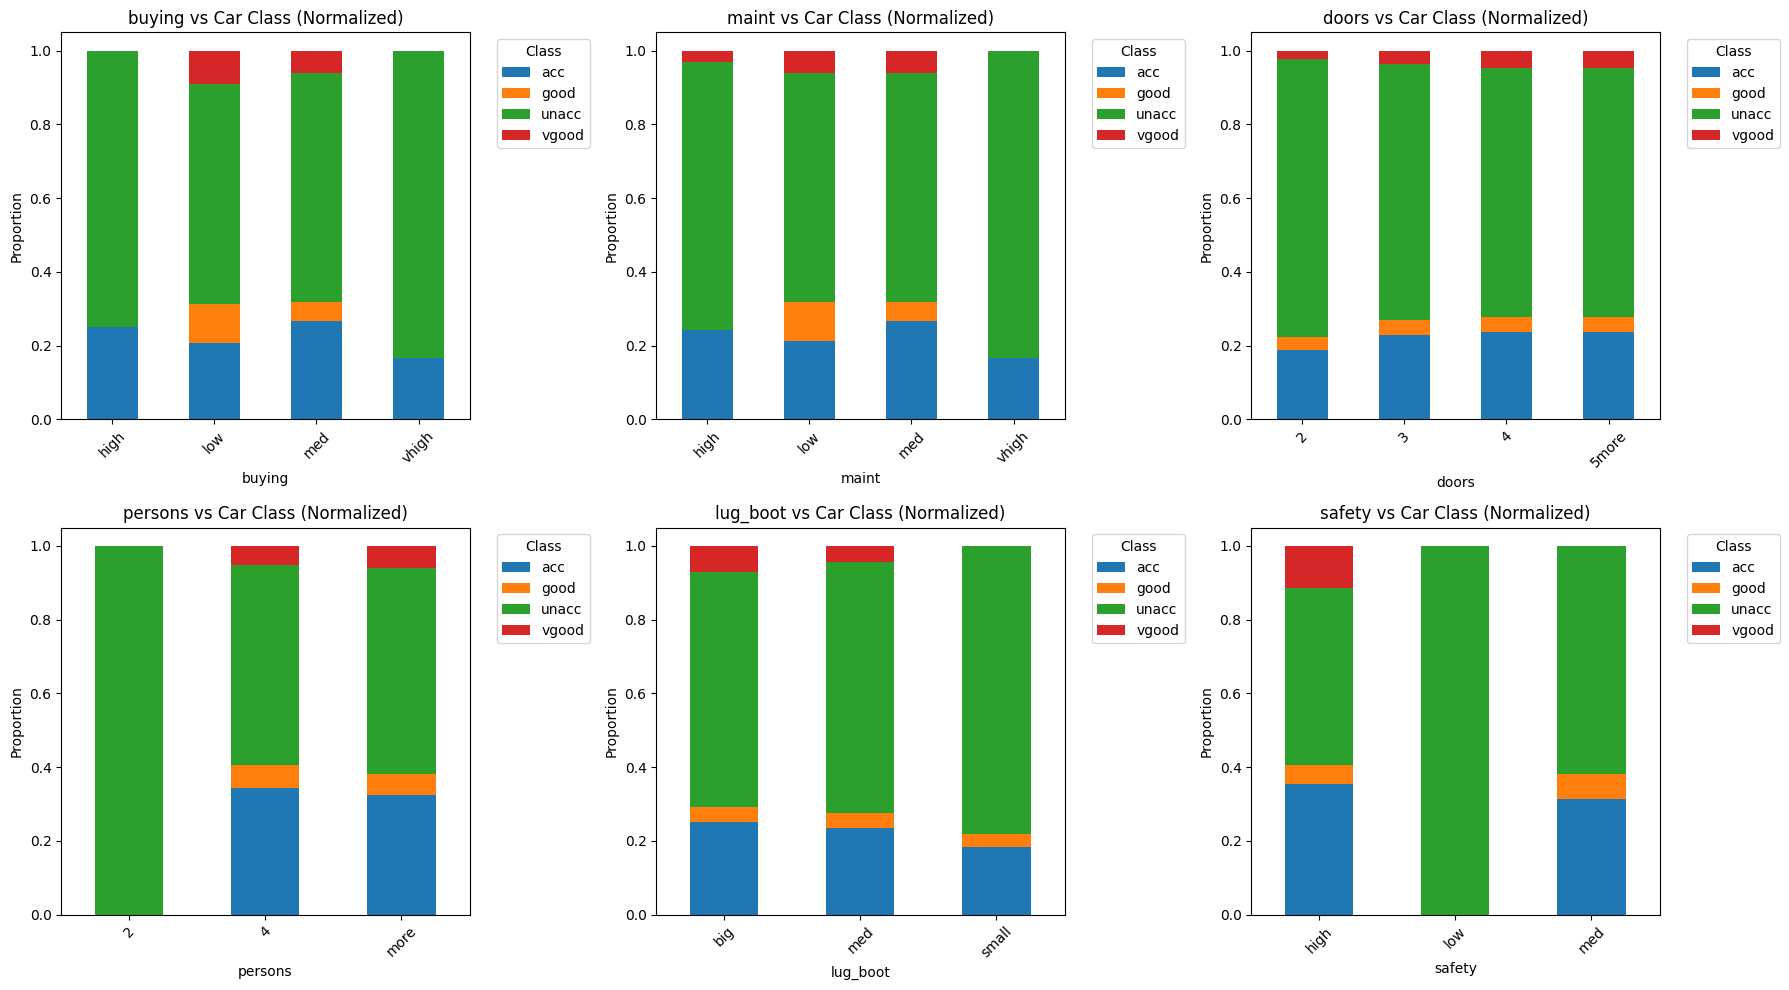

In [8]:
# Normalized stacked bar charts to see proportions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    ct = pd.crosstab(df[feature], df['class'], normalize='index')
    ct.plot(kind='bar', ax=axes[i], stacked=True)
    axes[i].set_title(f'{feature} vs Car Class (Normalized)')
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

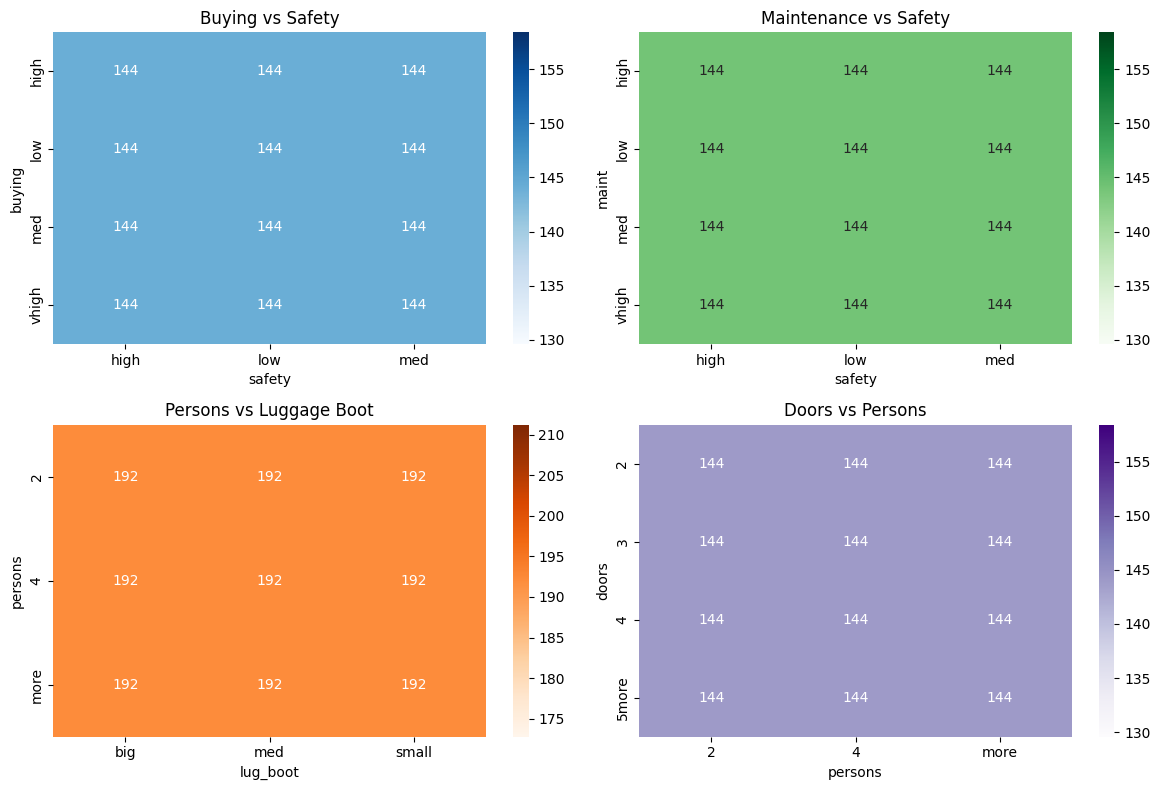

In [9]:
# Heatmap of feature combinations
# Create a sample heatmap for buying vs safety
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
ct1 = pd.crosstab(df['buying'], df['safety'])
sns.heatmap(ct1, annot=True, fmt='d', cmap='Blues')
plt.title('Buying vs Safety')

plt.subplot(2, 2, 2)
ct2 = pd.crosstab(df['maint'], df['safety'])
sns.heatmap(ct2, annot=True, fmt='d', cmap='Greens')
plt.title('Maintenance vs Safety')

plt.subplot(2, 2, 3)
ct3 = pd.crosstab(df['persons'], df['lug_boot'])
sns.heatmap(ct3, annot=True, fmt='d', cmap='Oranges')
plt.title('Persons vs Luggage Boot')

plt.subplot(2, 2, 4)
ct4 = pd.crosstab(df['doors'], df['persons'])
sns.heatmap(ct4, annot=True, fmt='d', cmap='Purples')
plt.title('Doors vs Persons')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [10]:
# Define ordinal mappings for features with inherent order
ordinal_mappings = {
    'buying': ['low', 'med', 'high', 'vhigh'],
    'maint': ['low', 'med', 'high', 'vhigh'],
    'doors': ['2', '3', '4', '5more'],
    'persons': ['2', '4', 'more'],
    'lug_boot': ['small', 'med', 'big'],
    'safety': ['low', 'med', 'high'],
    'class': ['unacc', 'acc', 'good', 'vgood']
}

print("Ordinal mappings:")
for feature, mapping in ordinal_mappings.items():
    print(f"{feature}: {mapping}")

Ordinal mappings:
buying: ['low', 'med', 'high', 'vhigh']
maint: ['low', 'med', 'high', 'vhigh']
doors: ['2', '3', '4', '5more']
persons: ['2', '4', 'more']
lug_boot: ['small', 'med', 'big']
safety: ['low', 'med', 'high']
class: ['unacc', 'acc', 'good', 'vgood']


In [11]:
# Apply ordinal encoding
df_processed = df.copy()

# Encode features using ordinal mapping
for feature, categories in ordinal_mappings.items():
    # Create ordinal encoder for this feature
    oe = OrdinalEncoder(categories=[categories])
    df_processed[feature + '_encoded'] = oe.fit_transform(df_processed[[feature]])

print("Encoded columns created:")
encoded_cols = [col for col in df_processed.columns if '_encoded' in col]
print(encoded_cols)

# Show encoding example
print("\nEncoding examples:")
for feature in ['buying', 'safety', 'class']:
    sample = df_processed[[feature, feature + '_encoded']].drop_duplicates().sort_values(feature + '_encoded')
    print(f"\n{feature}:")
    print(sample)

Encoded columns created:
['buying_encoded', 'maint_encoded', 'doors_encoded', 'persons_encoded', 'lug_boot_encoded', 'safety_encoded', 'class_encoded']

Encoding examples:

buying:
     buying  buying_encoded
1296    low             0.0
864     med             1.0
432    high             2.0
0     vhigh             3.0

safety:
  safety  safety_encoded
0    low             0.0
1    med             1.0
2   high             2.0

class:
      class  class_encoded
0     unacc            0.0
227     acc            1.0
1199   good            2.0
1097  vgood            3.0


In [12]:
# Prepare final dataset for modeling
feature_cols = [col for col in encoded_cols if col != 'class_encoded']
X = df_processed[feature_cols]
y = df_processed['class_encoded']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nFeature columns:")
print(X.columns.tolist())

print("\nFirst 5 rows of encoded features:")
print(X.head())
print("\nTarget distribution (encoded):")
print(y.value_counts().sort_index())

Features shape: (1728, 6)
Target shape: (1728,)

Feature columns:
['buying_encoded', 'maint_encoded', 'doors_encoded', 'persons_encoded', 'lug_boot_encoded', 'safety_encoded']

First 5 rows of encoded features:
   buying_encoded  maint_encoded  doors_encoded  persons_encoded  \
0             3.0            3.0            0.0              0.0   
1             3.0            3.0            0.0              0.0   
2             3.0            3.0            0.0              0.0   
3             3.0            3.0            0.0              0.0   
4             3.0            3.0            0.0              0.0   

   lug_boot_encoded  safety_encoded  
0               0.0             0.0  
1               0.0             1.0  
2               0.0             2.0  
3               1.0             0.0  
4               1.0             1.0  

Target distribution (encoded):
class_encoded
0.0    1210
1.0     384
2.0      69
3.0      65
Name: count, dtype: int64


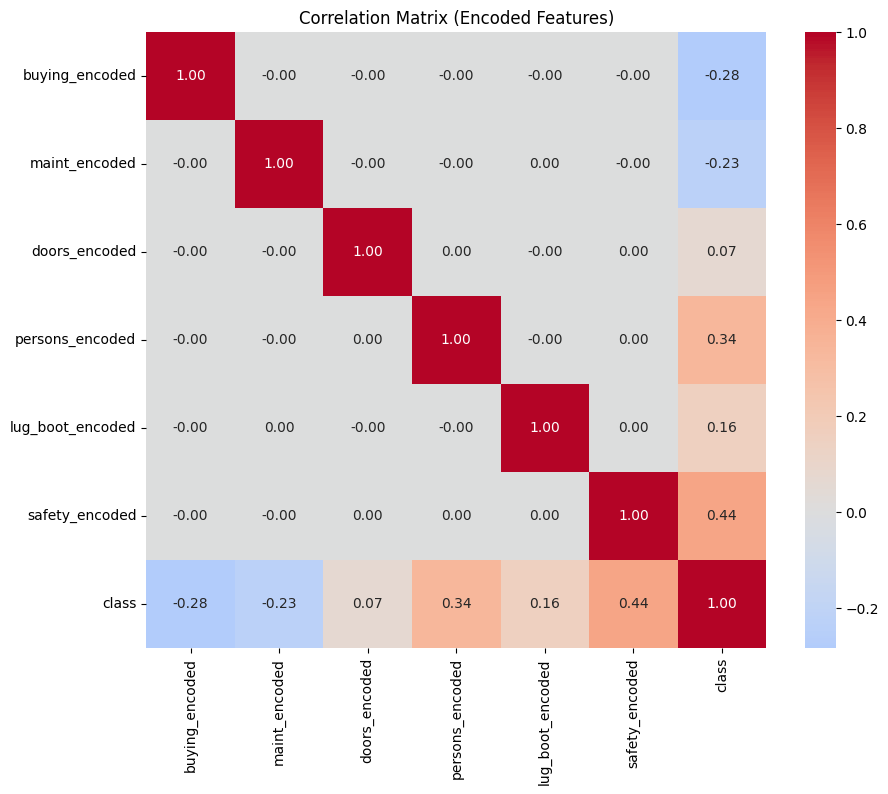

In [13]:
# Correlation analysis on encoded data
correlation_data = pd.concat([X, y], axis=1)
correlation_data.rename(columns={'class_encoded': 'class'}, inplace=True)

plt.figure(figsize=(10, 8))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix (Encoded Features)')
plt.show()

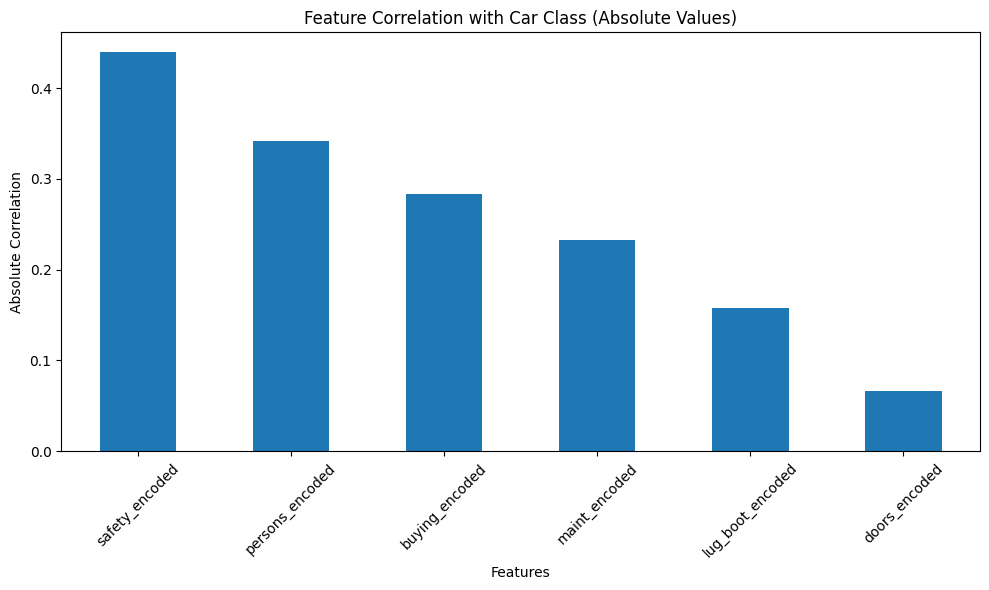

Feature correlations with car class:
safety_encoded      0.439337
persons_encoded     0.341707
buying_encoded      0.282750
maint_encoded       0.232422
lug_boot_encoded    0.157932
doors_encoded       0.066057
dtype: float64


In [14]:
# Feature importance based on correlation with target
feature_correlations = X.corrwith(y).abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_correlations.plot(kind='bar')
plt.title('Feature Correlation with Car Class (Absolute Values)')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Feature correlations with car class:")
print(feature_correlations)

Final class distribution:
class_encoded
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

Class percentages:
class_encoded
unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: proportion, dtype: float64


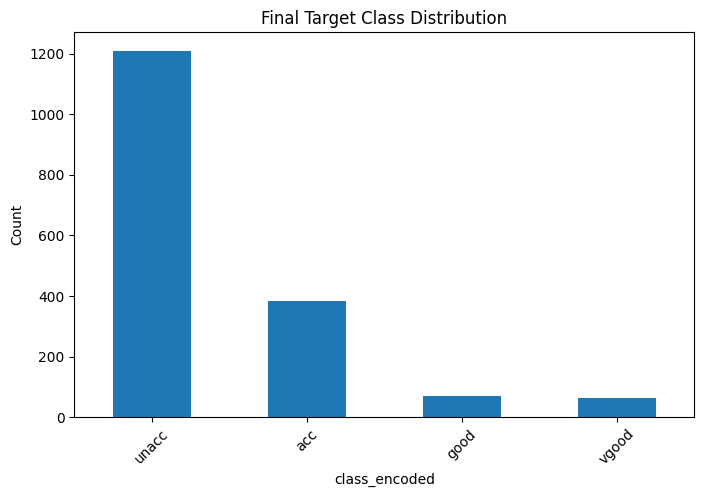

In [15]:
# Class distribution analysis
class_mapping = {0: 'unacc', 1: 'acc', 2: 'good', 3: 'vgood'}
y_named = y.map(class_mapping)

print("Final class distribution:")
print(y_named.value_counts())
print("\nClass percentages:")
print(y_named.value_counts(normalize=True) * 100)

# Check data balance
plt.figure(figsize=(8, 5))
y_named.value_counts().plot(kind='bar')
plt.title('Final Target Class Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Summary

**Dataset Overview:**
- Total cars: 1,728 evaluations
- Features: 6 categorical attributes (all ordinal)
- Target: Car acceptability (4 classes)

**Severe Class Imbalance Identified:**
- **Unacceptable**: 1,210 cars (70.0%) - Dominant class
- **Acceptable**: 384 cars (22.2%) - Moderate representation  
- **Good**: 69 cars (4.0%) - Severely underrepresented
- **Very Good**: 65 cars (3.8%) - Severely underrepresented

**Feature Importance Rankings (Real Data):**
1. **Safety** (0.44 correlation) - Most critical factor
2. **Persons** (0.34 correlation) - Passenger capacity crucial
3. **Buying Price** (0.28 correlation) - Cost importance
4. **Maintenance** (0.23 correlation) - Ongoing costs matter
5. **Luggage Boot** (0.16 correlation) - Storage space
6. **Doors** (0.07 correlation) - Least important factor

**Data Engineering Applied:**
- Ordinal encoding preserves natural ordering:
  - Prices: low(0) → med(1) → high(2) → vhigh(3)
  - Safety: low(0) → med(1) → high(2)
  - Capacity: 2(0) → 4(1) → more(2)
- Perfect categorical-to-numerical conversion

**Critical Modeling Challenges:**
- **Extreme class imbalance**: 96% of data in first 2 classes
- **Sparse positive classes**: Only ~8% good/very good cars
- Risk of model bias toward predicting "unacceptable"

**Recommended ML Approach:**
- **Resampling**: SMOTE or stratified sampling essential
- **Cost-sensitive learning**: Penalize misclassification of rare classes
- **Evaluation metrics**: Focus on precision/recall for minority classes
- **Algorithms**: Random Forest, Gradient Boosting (handle imbalance better)
- **Validation**: Stratified cross-validation to ensure all classes represented

**Business Insights:**
- Safety is paramount in car evaluation
- Passenger capacity nearly as important as safety
- Price sensitivity exists but secondary to safety/capacity
- Door count least discriminative factor

**Next Steps:**
- Apply class balancing techniques before modeling
- Use stratified train-test split
- Focus on macro-averaged F1 score and per-class metrics
- Consider hierarchical classification (acceptable vs unacceptable first)
- Feature selection may help with the highly correlated ordinal features